In [1]:
import mfd as mfd
from random import choices, seed

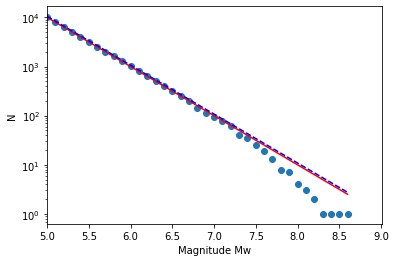

In [2]:
bvalue, avalue, Mmin, Mmax =1.0, 5.0, 5.0, 9.01
mags = mfd.test_sample_GRdistr(bvalue, avalue, Mmin, Mmax, nevents=10000, rseed=2222, doplot=True);

In [3]:
import numpy as np

In [4]:
np.random.normal(scale=0.05, size=1)[0]

0.03720196620680474

In [5]:
def sample_GRdistr(bvalue, avalue, Mmin, Mmax, \
                   nevents = 1000, mbin=0.1, \
                   rseed=None):
    
    mags = np.arange(Mmin, Mmax+mbin, mbin)
    
    N = [10**(avalue-bvalue*mw) for mw in mags]
    # weights- is this necessary
    probs = [n/sum(N) for n in N]
    seed(rseed)
    sample_mag = choices(mags, probs, k=nevents)
    return sample_mag


In [11]:
bvalue, avalue, Mmin, Mmax =1.0, 5.0, 5.0, 9.01
mags = sample_GRdistr(bvalue, avalue, Mmin, Mmax, \
                   nevents = 100000, mbin=0.001, \
                   rseed=12121);

In [17]:
b = mfd.calc_bvalue(mags, magbin=0.001)
b = mfd.calc_avalue(mags, magbin=0.001)
print(b)

0.9975569350350355


In [ ]:
print(mags)
plt.hist(mags)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mags = np.random.exponential(scale= 0.5/np.log(10), size=100000)


In [ ]:
b = mfd.calc_bvalue(mags, magbin=0.001)

In [ ]:
b

In [ ]:
plt.hist(mags);

In [ ]:
b*np.log(10)